# OSM API

https://wiki.openstreetmap.org/wiki/Osmapi

https://github.com/metaodi/osmapi

In [6]:
import osmapi as osm
from PIL import Image
import requests
from io import BytesIO

https://www.openstreetmap.org/query?lat=47.3777&lon=8.5396

In [7]:
api = osm.OsmApi() # this instantiate the OsmApi class - do you need to authorise?
way = api.WayGet(672886106)

In [8]:
way

{'id': 672886106,
 'visible': True,
 'version': 1,
 'changeset': 67550442,
 'timestamp': datetime.datetime(2019, 2, 25, 14, 15, 1),
 'user': 'km2bp',
 'uid': 3610826,
 'tag': {'building': 'residential',
  'image': 'https://images.mapillary.com/cNSbRaZG6qlp_I1v7wu_dA/thumb-2048.jpg',
  'mapillary': 'https://www.mapillary.com/map/im/cNSbRaZG6qlp_I1v7wu_dA'},
 'nd': [6301310500,
  6301310501,
  6301310502,
  6301310503,
  6301310504,
  6301310505,
  6301310506,
  6301310507,
  6301310508,
  6301310509,
  6301310510,
  6301310511,
  6301310512,
  6301310513,
  6301310514,
  6301310515,
  6301310516,
  6301310517,
  6301310518,
  6301310519,
  6301310520,
  6301310521,
  6301310522,
  6301310523,
  6301310524,
  6301310525,
  6301310526,
  6301310527,
  6301310528,
  6301310529,
  6301310530,
  6301310531,
  6301310532,
  6301310533,
  6301310534,
  6301310535,
  6301310500]}

In [9]:
# Visualization of attributes
response = requests.get(way['tag']['image'])
img = Image.open(BytesIO(response.content))

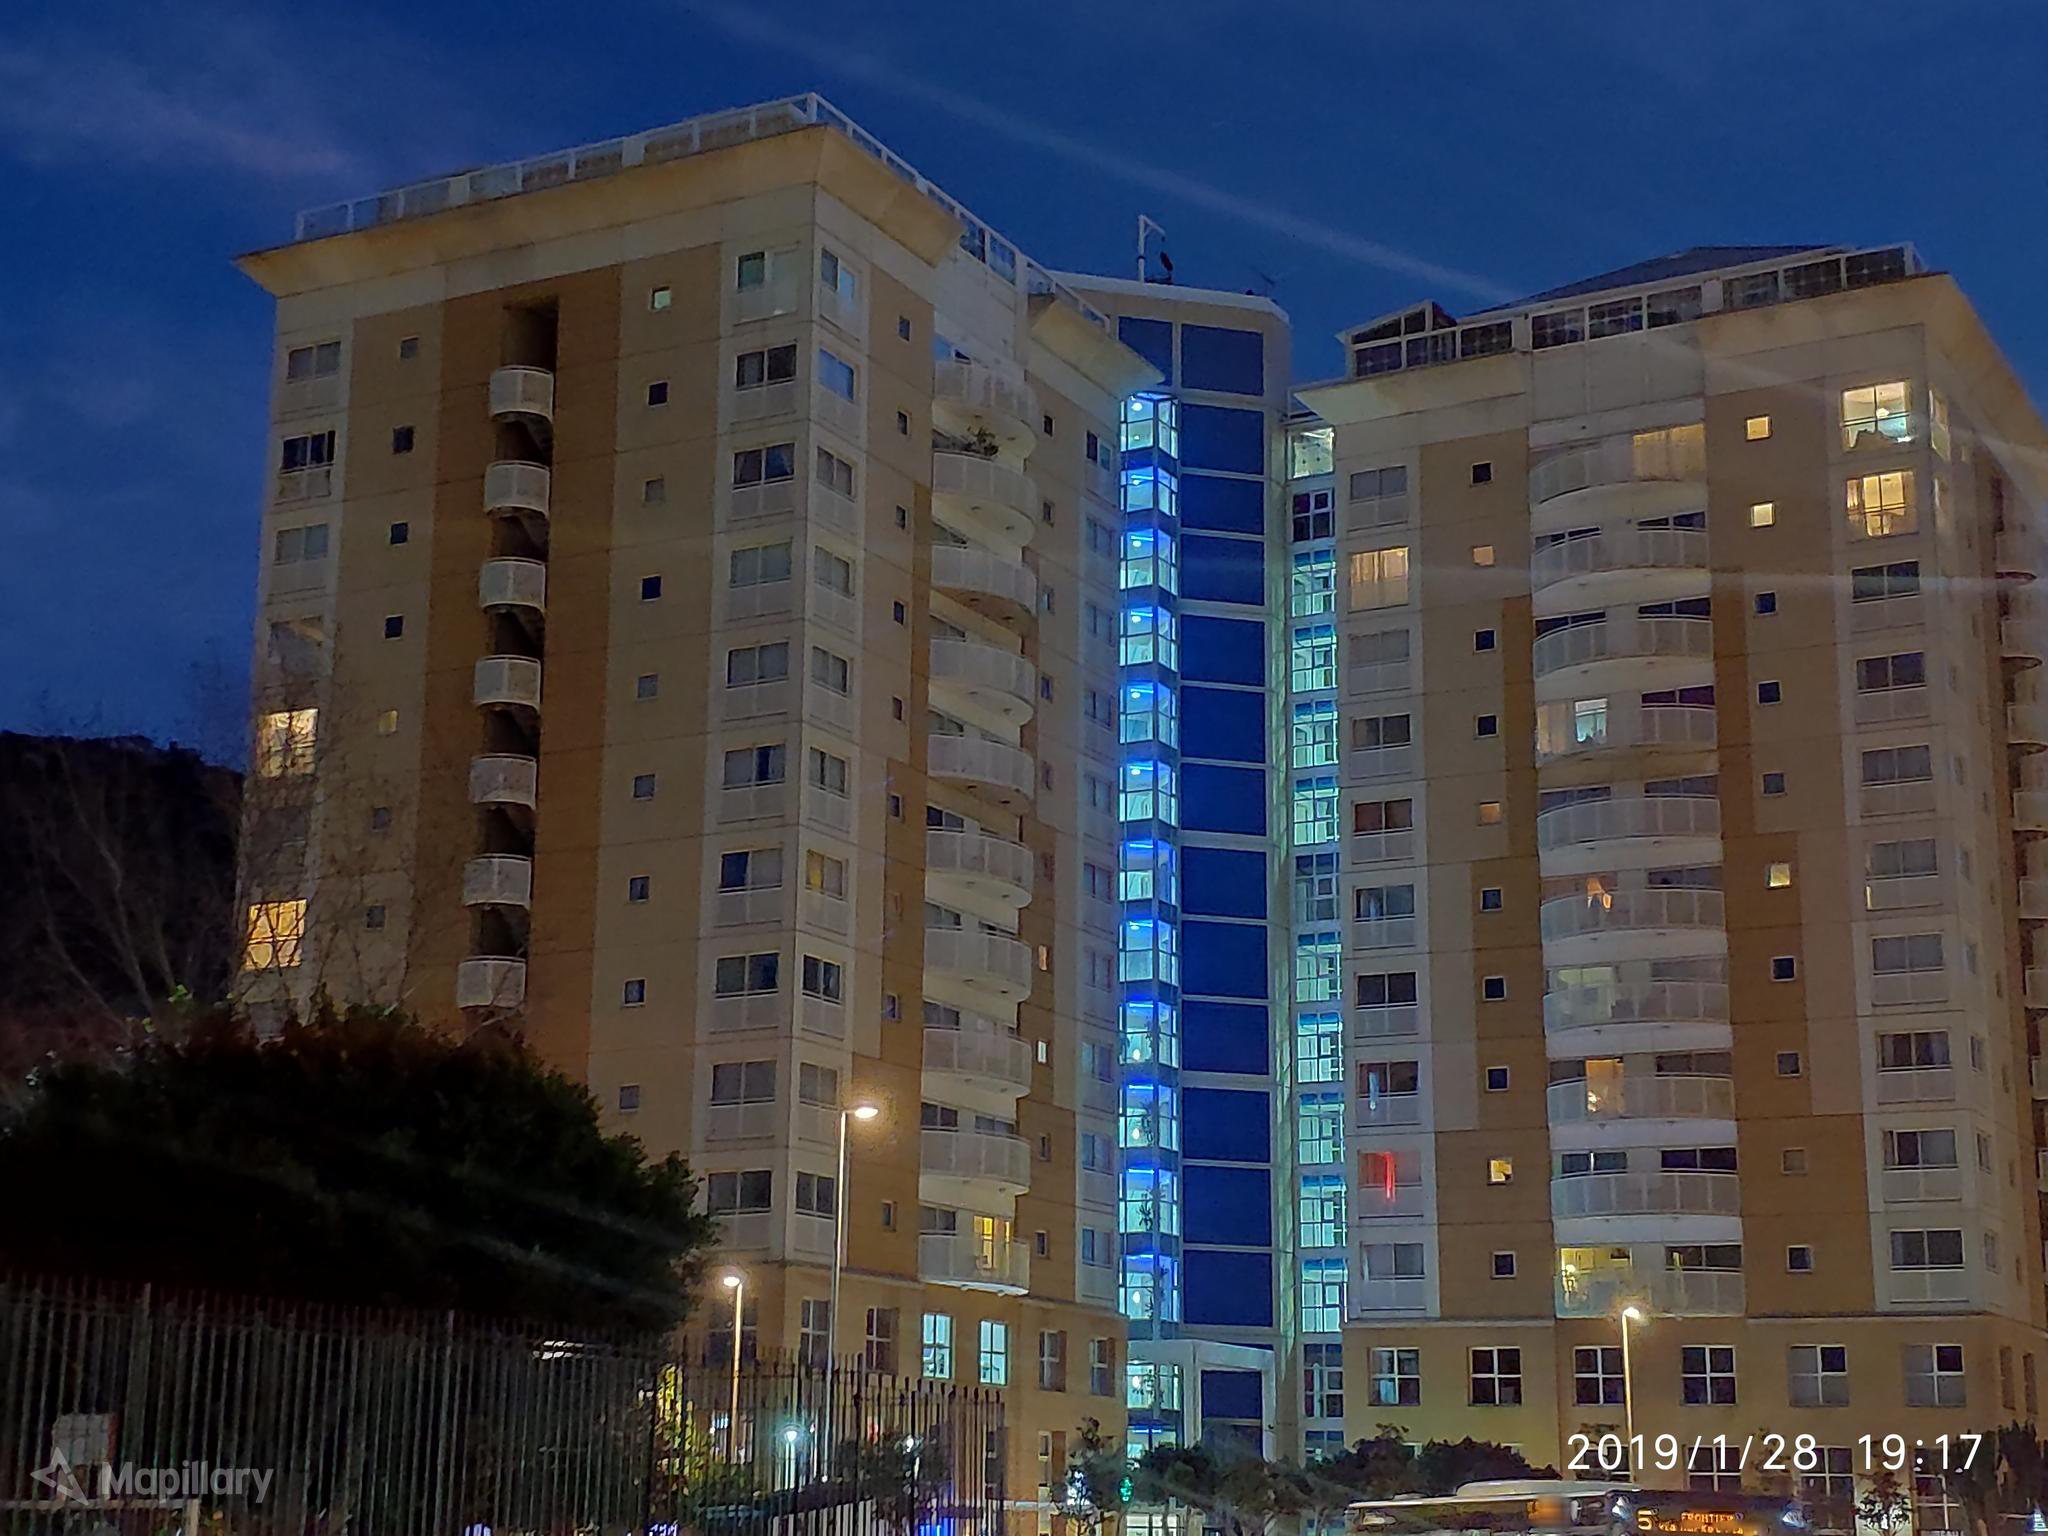

In [10]:
img

# OSMPythonTools

https://github.com/mocnik-science/osm-python-tools

## Example 1

In [15]:
!pip install OSMPythonTools

     |████████████████████████████████| 4.6 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 2.5 MB/s eta 0:00:011
     |████████████████████████████████| 720 kB 1.1 MB/s eta 0:00:01
  Created wheel for OSMPythonTools: filename=OSMPythonTools-0.2.9-py3-none-any.whl size=12772 sha256=ed6928210b5a7a849edb5f865d8f01385bc0352947a3193449af4c5d5f9a852c
  Stored in directory: /Users/mvvm/Library/Caches/pip/wheels/a6/c0/d1/0c56a62cc0b3280cb669386a60c54daf69cb00c33af705dada
  Created wheel for pytest-sugar: filename=pytest_sugar-0.9.4-py2.py3-none-any.whl size=8972 sha256=b277765b0c5440e36512d1bbf92a8e3b39393a4735113c31474e4d9465eebe7b
  Stored in directory: /Users/mvvm/Library/Caches/pip/wheels/03/4e/79/49721a5712613cdb0fc9d9e09aba8bdf42774c22808e8bca69
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=9890f7e57089b6dd7faf62d8463d733ff0686351bb409d8945811a3811c90e03
  Stored in directory: /Users/mvvm/Library/Caches/pip/wheels/a0/16/9

_Which object does the way with the id 5887599 represent?_

In [11]:
from OSMPythonTools.api import Api
api = Api()
way = api.query('way/5887599')

In [12]:
print(way.tag('building'))
print(way.tag('architect'))
print(way.tag('website'))

castle
Johann Lucas von Hildebrandt
https://www.belvedere.at/


## Example 2

_What is the English name of the church called ‘Stephansdom’, what address does it have, and which of which denomination is the church?_

In [13]:
from OSMPythonTools.overpass import Overpass
from OSMPythonTools.api import Api
overpass = Overpass()
result = overpass.query('way["name"="Stephansdom"]; out body;')

In [14]:
stephansdom = result.elements()[0]

In [16]:
stephansdom.tag('name:en')
'%s %s, %s %s' % (stephansdom.tag('addr:street'), stephansdom.tag('addr:housenumber'), stephansdom.tag('addr:postcode'), stephansdom.tag('addr:city'))
stephansdom.tag('building')
stephansdom.tag('denomination')

'roman_catholic'

## Example 3

_How many trees are in the OSM data of Vienna? And how many trees have there been in 2013?_

In [17]:
from OSMPythonTools.nominatim import Nominatim
nominatim = Nominatim()
areaId = nominatim.query('Vienna, Austria').areaId()

In [29]:
areaId

3600109166

In [31]:
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
overpass = Overpass()
query = overpassQueryBuilder(area=areaId, elementType='node', selector='"natural"="tree"', out='count')
result = overpass.query(query)
result.countElements()

141750

In [ ]:
result = overpass.query(query, date='2013-01-01T00:00:00Z', timeout=60)
result.countElements()

## Example 4

_Where are waterbodies located in Vienna?_

In [32]:
from OSMPythonTools.nominatim import Nominatim

nominatim = Nominatim()
areaId = nominatim.query('Vienna, Austria').areaId()

In [33]:
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
overpass = Overpass()
query = overpassQueryBuilder(area=areaId, elementType=['node', 'relation'], selector='"natural"="water"', includeGeometry=True)
result = overpass.query(query, timeout=180)

[overpass] downloading data: [timeout:25][out:json];area(3600109166)->.searchArea;(way["natural"="water"](area.searchArea);relation["natural"="water"](area.searchArea);); out body geom;


In [34]:
firstElement = result.elements()[0]
firstElement.geometry()

{"coordinates": [[[16.498671, 48.27628], [16.4991, 48.276345], [16.499181, 48.276314], [16.499226, 48.276281], [16.499257, 48.276241], [16.499258, 48.276121], [16.499112, 48.275847], [16.499063, 48.275695], [16.498993, 48.275574], [16.498807, 48.275361], [16.498701, 48.275209], [16.498407, 48.274805], [16.498273, 48.274666], [16.497395, 48.273634], [16.49734, 48.273462], [16.497235, 48.273291], [16.497035, 48.273058], [16.496515, 48.272456], [16.496426, 48.272255], [16.496268, 48.272081], [16.49602, 48.271804], [16.495863, 48.271648], [16.49581, 48.271527], [16.495374, 48.270954], [16.495014, 48.270454], [16.494752, 48.27011], [16.494612, 48.269982], [16.494456, 48.269822], [16.494078, 48.269674], [16.493853, 48.269678], [16.493247, 48.269762], [16.492604, 48.26991], [16.492203, 48.269956], [16.491743, 48.27001], [16.490983, 48.270095], [16.490779, 48.270151], [16.490071, 48.270256], [16.489984, 48.270273], [16.489959, 48.270309], [16.489959, 48.270352], [16.490005, 48.270461], [16.490

## Example 5

_How did the number of trees in Berlin, Paris, and Vienna change over time?_

In [ ]:
from collections import OrderedDict
from OSMPythonTools.data import Data, dictRangeYears, ALL
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass

In [ ]:
dimensions = OrderedDict([
    ('year', dictRangeYears(2013, 2017.5, 1)),
    ('city', OrderedDict({
        'berlin': 'Berlin, Germany',
        'paris': 'Paris, France',
        'vienna': 'Vienna, Austria',
    })),
])

In [ ]:
overpass = Overpass()
def fetch(year, city):
    areaId = nominatim.query(city).areaId()
    query = overpassQueryBuilder(area=areaId, elementType='node', selector='"natural"="tree"', out='count')
    return overpass.query(query, date=year, timeout=120).countElements()
data = Data(fetch, dimensions)

In [ ]:
data.plot(city=ALL, filename='example4.png')

In [ ]:
data.select(city=ALL).getCSV()

# One more example with Overpass_API

https://wiki.openstreetmap.org/wiki/Overpass_API

https://medium.com/better-programming/how-to-get-open-street-and-map-data-using-python-2b777bf5af14

`node["amenity"="cafe"]({{bbox}}); out;`

`node["amenity"="pub"](53.2987342,-6.3870259,53.4105416,-6.1148829); out;
`

`( node["amenity"="cafe"]({{bbox}});
  way["amenity"="cafe"]({{bbox}});
  relation["amenity"="cafe"]({{bbox}});
);
out;`

`area["ISO3166-1"="GB"][admin_level=2];
node["place"="city"](area);
out;`

In this case, area IDs need to be derived from an existing OSM way by adding `2400000000` to its OSM ID, or, in case of relation, by adding `3600000000`

`area(3600062149);
node["place"="city"](area);
out;`

The first set of values can control the verbosity or the detail of information of the output, such as `ids`, `skel`, `body`(default value), `tags`, `meta`, and `count`

For more information please follow the link: https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_QL

In [ ]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Collect coords into list
coords = []
for element in data['elements']:
    if element['type'] == 'node':
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
    elif 'center' in element:
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [35]:
import overpy
api = overpy.Overpass()
r = api.query("""
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
""")
coords  = []
coords += [(float(node.lon), float(node.lat)) 
           for node in r.nodes]
coords += [(float(way.center_lon), float(way.center_lat)) 
           for way in r.ways]
coords += [(float(rel.center_lon), float(rel.center_lat)) 
           for rel in r.relations]

ModuleNotFoundError: No module named 'overpy'

In [ ]:
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()